In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.1


In [14]:
from sie.mcmc import MCMCModel,Bernoulli,Uniform,Cauchy,Normal,Jeffreys,Beta
rcParams['figure.figsize']=(6,3)

# Thumbtack Flip Model

In [4]:
D=3
U=9
N=U+D

In [6]:
def P_data(data,θ):
    # log likelihood function
    D,U=data
    N=D+U
    
    return D*log(θ)+(N-D)*log(1-θ)
    

In [11]:
from sie.mcmc import MCMCModel,Uniform

In [8]:
data=D,U
model=MCMCModel(data,P_data,
               θ=Uniform(0,1),  # prior on θ
               )

In [9]:
model.run_mcmc(500)

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
0.70 s


figsize [8.0, 5.0]


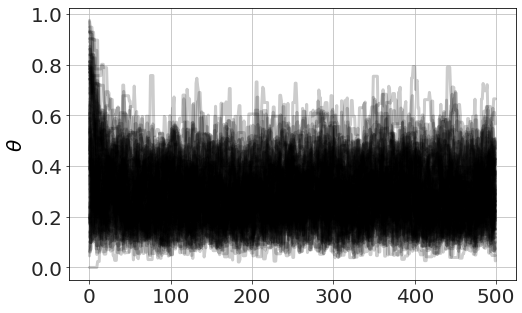

In [10]:
model.plot_chains()

## Pyndamics introduction

In [33]:
from pyndamics import Simulation
from pyndamics.emcee import *

Text(0, 0.5, 'Height [cm]')

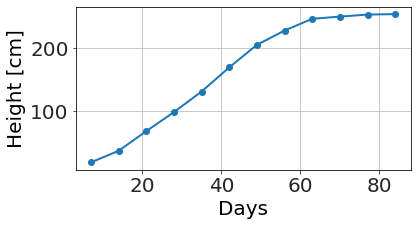

In [34]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

plot(t,h,'-o')
xlabel('Days')
ylabel('Height [cm]')

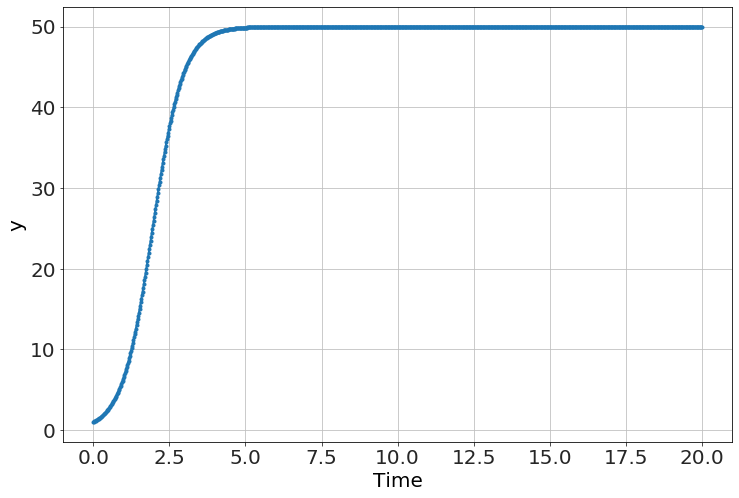

<Figure size 432x216 with 0 Axes>

In [16]:
sim=Simulation()
sim.add(" y'=r*y*(1-y/K) ",1,plot=True)
sim.params(r=2,K=50)
sim.run(0,20)

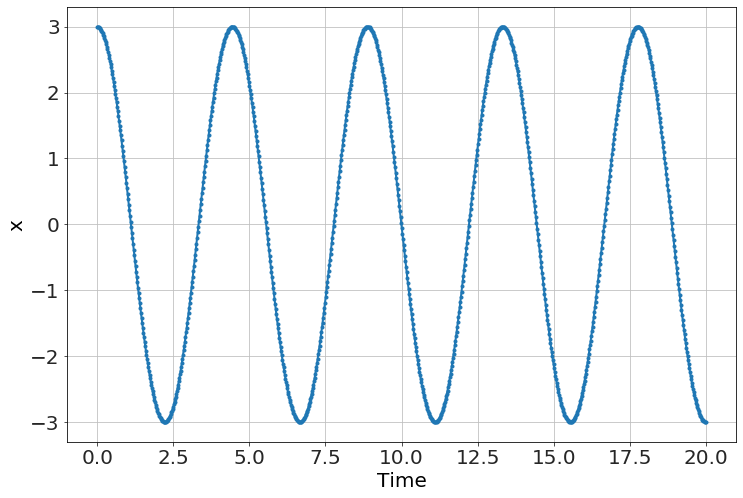

<Figure size 432x216 with 0 Axes>

In [20]:
sim=Simulation()
sim.add(" x'=v ",3,plot=True)
sim.add(" v'=-k*x/m ",0,plot=False)
sim.params(k=2,m=1)
sim.run(0,20)

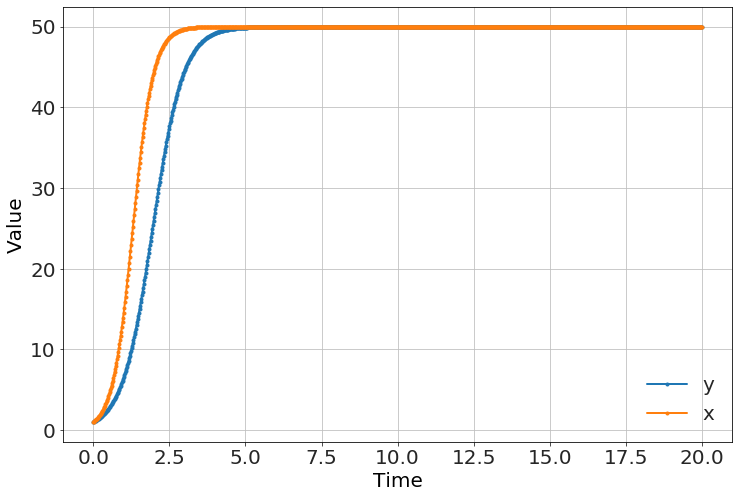

<Figure size 432x216 with 0 Axes>

In [23]:
sim=Simulation()
sim.add(" y'=r*y*(1-y/K) ",1,plot=1)
sim.add(" x'=r2*x*(1-x/K2) ",1,plot=1)
sim.params(r=2,K=50,r2=3,K2=50)
sim.run(0,20)

## adding some data

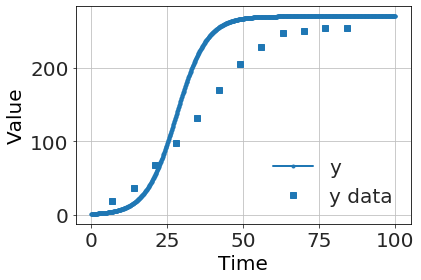

<Figure size 432x216 with 0 Axes>

In [31]:
t_data=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h_data=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])


sim=Simulation()
sim.figsize=(6,4)
sim.add(" y'=r*y*(1-y/K) ",1,plot=True)
sim.params(r=.2,K=270)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.run(0,100)

In [35]:
model=MCMCModel(sim,
               r=Uniform(0,1),
               K=Uniform(100,400))

In [36]:
model.run_mcmc(500)

Sampling Prior...
Done.
0.38 s
Running MCMC...
Done.
48.62 s


<Figure size 432x216 with 0 Axes>

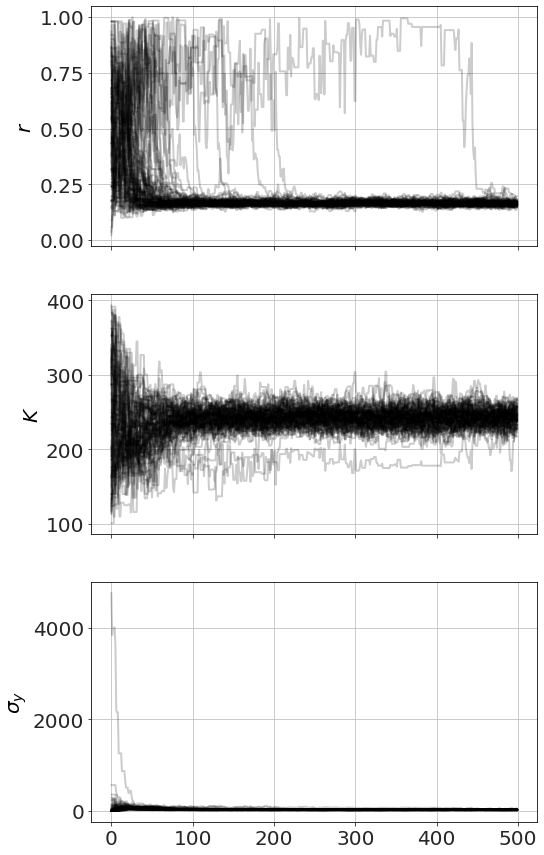

In [37]:
model.plot_chains()

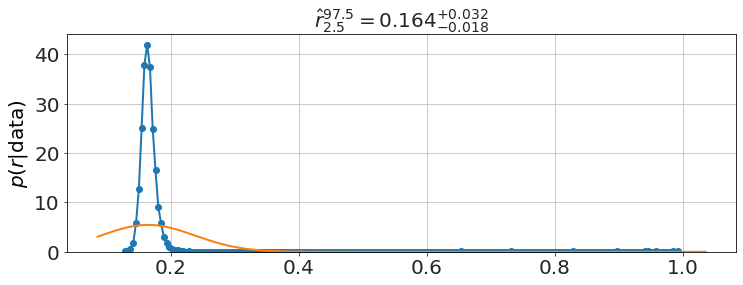

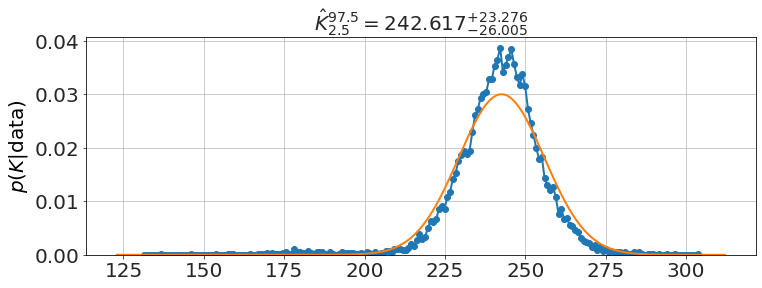

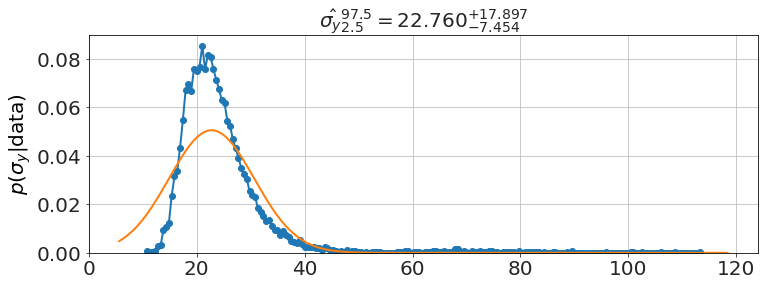

In [38]:
model.plot_distributions()

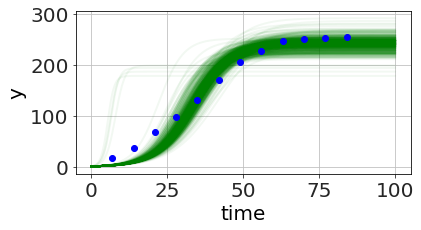

In [42]:
model.plot_many(0,100,'y')